<a href="https://colab.research.google.com/github/malvikavishy/SoH/blob/SoH/Spring2021/Dainong/hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe
!pip install rdp
!pip install requests

     |████████████████████████████████| 32.8 MB 47 kB/s 
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4587 sha256=c37451a49ff597b5eff2a678c364b6ddcb6e29a27172ba0eccbd39d0f870f079
  Stored in directory: /root/.cache/pip/wheels/ee/30/35/b52f1e297bfd39e8a51f203dc46dc50cf411a6cc151296b13f
Successfully built rdp


In [3]:
from google.colab import files
files.upload()

Saving hand z.txt to hand z.txt


{'hand z.txt': b'0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t-732.264\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0

(0, 479)
(0, 402)
(372, 336)
(156, 69)


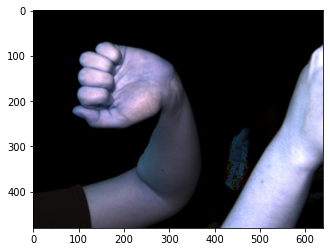

In [14]:
    import numpy as np
    from rdp import rdp
    from PIL import Image, ImageEnhance
    import cv2 as cv
    import sys
    import mediapipe as mp
    from matplotlib import pyplot as plt
    import matplotlib.image as mpimg
    import imutils
    from math import radians, cos, sin, asin, sqrt
    import math
    import requests
    import os
    img = cv.imread('hand a.jpg')
    image_height, image_width, _ = img.shape
    # Z data input
    z = 'hand z.txt'  # Z and RGB
    z_0 = np.loadtxt(z)
    
    imgplot = plt.imshow(img)

    
    #noise reduction
    hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lower = np.array([0, 5, 5], dtype="uint8")
    upper = np.array([200, 200, 200], dtype="uint8")
    skinRegionHSV = cv.inRange(hsvim, lower, upper)
    blurred = cv.blur(skinRegionHSV, (2, 2))
    ret, thresh = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY)
    #cv.imwrite("thresh.jpg", thresh)
    
    #contours
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv.contourArea(x))
    #cv.drawContours(img, [contours], -1, (255, 255, 0), 2)
    #cv.imwrite("contours.jpg", img)
    
    hull = cv.convexHull(contours)
    #cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
    #cv.imwrite("hull.jpg", img)

    hull = cv.convexHull(contours, returnPoints=False)
    defects = cv.convexityDefects(contours, hull)
    
    #Get Extreme Points
    cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    
    #Get center point
    M = cv.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    
    #Top
    x = 640
    while(x > 0):
        y = 0
        while(y < extTop[1] - 10):
            #print(x)
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            y = y + 1
        x = x - 1
    
    #Bottom
    x = 0
    while(x < 640):
        y = 480
        while(y > extBot[1] + 10):
            #print(x)
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            y = y - 1
        x = x + 1
    #Left
    y = 0
    while(y < 480):
        x = 0
        while(x < extLeft[0] - 10):
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            x = x + 1
        y = y + 1
    
    #Right
    y = 0
    while(y < 480):
        x = 640
        while(x > extRight[0] + 10):
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            x = x - 1
        y = y + 1
    
    # draw the center of the shape on the image
    #cv.circle(img, (cX, cY), 7, (0, 0, 255), -1)
    imgplot = plt.imshow(img)
    print(extBot)
    print(extLeft)
    print(extRight)
    print(extTop)
    
    y2, y1, x2, x1 = extBot[1], extTop[1], extLeft[0], extRight[0]
    

In [15]:
img_0 = img[int(y1 - int(y1/2)) : int(y2 + int(y2/3)), int(x2 - int(x2/2)): int(x1 + int(x1/3))]

z = z_0[int(y1 - int(y1/2)) : int(y2 + int(y2/3)), int(x2 - int(x2/2)): int(x1 + int(x1/3))]
z_height = z.shape[0]
z_width = z.shape[1]

In [ ]:
image_0 = img_0 # im2arr.shape: height x width x channel

# for i in range(z_height):
#   for j in range(z_width):
#     if z[i][j] < -800:
#       z[i][j] = 0
#       image_0[i, j, 0] = 255
#       image_0[i, j, 1] = 255
#       image_0[i, j, 2] = 255
#     if image_0[i][j][0] < 20 and image_0[i][j][0] < 20 and image_0[i][j][0] < 20:
#       image_0[i][j][0] = 255
#       image_0[i][j][1] = 255
#       image_0[i][j][2] = 255

im = Image.fromarray(np.uint8(image_0)).convert('RGB')

plt.imshow(image_0)
im.save('image.jpg')

Handedness:  [classification {
  index: 1
  score: 0.983875572681427
  label: "Right"
}
]


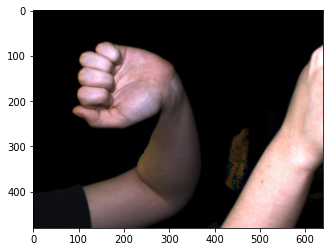

In [16]:
a_image = img
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
#a_image = cv.flip(a_image, 1)
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.5)
results = hands.process(cv.cvtColor(a_image,cv.COLOR_BGR2RGB))
plt.imshow(cv.cvtColor(a_image,cv.COLOR_BGR2RGB))
print('Handedness: ', results.multi_handedness)



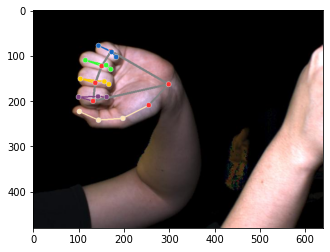

In [17]:
annotated_image = a_image.copy()
mp_drawing_styles = mp.solutions.drawing_styles

for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
imageshow = plt.imshow(cv.cvtColor(annotated_image,cv.COLOR_BGR2RGB))

In [18]:
# x coordinates
p0x = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
p1x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
p2x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
p3x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
p4x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
p5x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
p6x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
p7x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
p8x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
p9x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
p10x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
p11x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
p12x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
p13x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
p14x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
p15x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
p16x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
p17x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
p18x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
p19x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
p20x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width

p0y = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
p1y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
p2y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
p3y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
p4y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
p5y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
p6y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
p7y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
p8y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
p9y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
p10y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
p11y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
p12y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
p13y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
p14y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
p15y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
p16y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
p17y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
p18y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
p19y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
p20y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height

# z coordinates
# p0z = z[int(p0y)][int(p0x)]
# p1z = z[int(p1y)][int(p1x)]
# p2z = z[int(p2y)][int(p2x)]
# p3z = z[int(p3y)][int(p3x)]
# p4z = z[int(p4y)][int(p4x)]
# p5z = z[int(p5y)][int(p5x)]
# p6z = z[int(p6y)][int(p6x)]
# p7z = z[int(p7y)][int(p7x)]
# p8z = z[int(p8y)][int(p8x)]
# p9z = z[int(p9y)][int(p9x)]
# p10z = z[int(p10y)][int(p10x)]
# p11z = z[int(p11y)][int(p11x)]
# p12z = z[int(p12y)][int(p12x)]
# p13z = z[int(p13y)][int(p13x)]
# p14z = z[int(p14y)][int(p14x)]
# p15z = z[int(p15y)][int(p15x)]
# p16z = z[int(p16y)][int(p16x)]
# p17z = z[int(p17y)][int(p17x)]
# p18z = z[int(p18y)][int(p18x)]
# p19z = z[int(p19y)][int(p19x)]
# p20z = z[int(p20y)][int(p20x)]

In [27]:
# A hand
# A hand is not properly capture
def A_hand():
  if p5x < p7x < p8x:
    if p9x < p11x < p12x:
      if p13x < p15x < p16x:
        if p17x < p19x < p20x:
          if p4x < p3x < p2x:
            print("A")


# B hand
def B_hand():
  if p8x < p7x < p6x < p5x:
    if p12x < p11x < p10x < p9x:
      if p16x < p15x < p14x < p13x:
        if p20x < p19x < p18x < p17x:
          if p4x < p3x < p2x < p1x:
            if p20y > p16y > p12y > p8y:
              print("B")
              return True
  return False

# C hand

def C_hand():
  if p5x > p6x > p7x:
    if p9x > p10x > p11x:
      if p13x > p14x > p15x:
        if p17x > p18x > p19x:
          if p2x > p3x > p4x:
            print("C")
            return True
  return False

def D_hand():
  if p8x < p7x < p6x < p5x:
    if p12x > p11x > p9x:
      if p16x > p15x > p13x:
        if p19x < p20x:
          if p2x > p3x > p4x:
            if p4x > p5x:
              print("D")
              return True
  return False

def E_hand():
  if p8x > p5x > p6x:
    if p12x > p9x > p10x:
      if p16x > p13x > p14x:
        if p20x > p17x > p18x:
          if p4x > p5x:
            print("E")
            return True
  return False

def F_hand():
  if p12x < p11x < p10x < p9x:
    if p16x < p15x < p14x < p13x:
      if p20x < p19x < p18x < p17x:
        if p7x < p8x:
          if p4x < p3x:
            if p3x > p8x:
              print("F")
              return True
  return False

def G_hand():
  if p8x < p7x < p6x < p5x:
    if p4x < p5x:
      if p12x > p11x > p9x:
        if p16x > p15x > p13x:
          if p20x > p19x > p17x:
            print("G")
            return True
  return False


In [32]:
# I
def I_hand():
  if p8x > p7x and p7x > p6x:
    if p12x > p11x and p11x > p10x:
      if p16x > p15x and p15x > p14x:
        if p20x < p19x and p19x < p18x and p18x < p17x:
          if p4x < p3x and p3x < p2x and p3y < p4y:
            print("I")
            return True
  return False


# J
def J_hand():
  if p8x > p7x and p7x > p6x:
    if p11y > p8y and p12x > p11x and p11x > p10x and p10x > p6x:
      if p16x > p15x and p15x > p14x:
        if p20x < p19x and p19x < p18x:
          print("J")
          return True
  return False



# K
def K_hand():
  if p8x < p7x and p7x < p6x and p8y < p7y:
    if p12x < p11x and p11x < p10x and p12y < p11y:
      if p16y > p15y and p14y < p13y and p16y > p14y:
        if p20y > p19y  and p18y < p17y and p20y > p18y:
          if((p8x < p7x) and (p7x < p6x) and (p6x < p5x)):
            if p4x < p3x and p3x < p2x:
              print("K")
              return True
  return False


# L
def L_hand():
  if((p8x < p7x) and (p7x < p6x) and (p6x < p5x)):
    if ((p12x > p11x) and (p11x > p10x)):
      if ((p16x > p15x) and (p15x > p14x)):
        if ((p20x > p19x) and (p19x > p18x)):
          if ((p4y < p3y) and (p3y < p2y)):
            print("L")
            return True
  return False


# M
def M_hand():
  if((p6x < p5x) and (p6x < p7x) and p5x > p8x):
    if ((p10x < p9x) and (p10x < p11x) and (p11x < p12x)):
      if((p14x < p13x) and (p14x < p15x) and (p15x < p16x)):
        if((p18x < p17x) and (p18x < p19x) and (p19x < p20x)):
          if ((p3x < p2x) and (p3y < p4y)): 
            print("M")
            return True
  return False

# N
def N_hand():
  if ((p7x < p8x) and (p6x < p7x)):
    if (p11x < p12x):
      if ( (p15x > p14x) and (p15x < p16x)):
        if ((p19x > p18x) and (p19x < p20x)):
          if (p3x < p2x) and (p4x < p3x):
            print("N")
            return True
  return False


# O
def O_hand():
  if ((p8x > p7x) and (p6x < p5x)):
    if ((p12x > p11x) and (p11x > p10x)):
      if ((p16x > p15x) and (p15x > p14x)):
        if ((p20x > p19x)):
          if ((p4x < p3x) and (p3x < p2x) and (p3y < p4y)):
            print("O???")
            return True
  return False



# P
def P_hand():
  if p8x > p7x and p8y < p7y and p7y < p6y:
    if p12x < p11x and p11x < p10x:
      if p16x < p15x and p15x < p14x:
        if p20x < p19x and p19x < p18x:
          if p8x < p7x and p7x < p6x:
            print("P")
            return True
  return False



# Q
def Q_hand():
  if p8x < p5x < p4x:
    if p12x > p9x and p11x > p9x:
      if p16x > p13x and p15x > p13x:
        if p20x > p17x and p19x > p17x:
          print("Q")
          return True
  return False



# R
def R_hand():
  if p4x > p3x:
    if p12x < p11x and p11x < p10x and p10x < p9x and p12y < p8y:
      if p16x > p15x and p15x > p14x:
        if p20x > p19x and p19x > p18x:
          if p4y > p3y and p3y > p2y and p3x < p4x:
            print("R")
            return True
  return False



In [29]:
# S Hand:
def S_hand():
  if((p8x < p7x) and (p7x < p6x)):
    if (p12x < p11x) and (p11x < p10x):
      if ((p16x < p15x) and (p15x < p14x)):
        if (p20x < p19x) and (p19x < p18x):
          if (p4x > p2x) and (p2x > p1x) and (p4y > p1y) and (p4y > p3y) and (p3y > p2y) and (p4y > p8y):
            print("S")
            return True
  return False

# T Hand:
def T_hand():
  if (p8x < p7x) and (p7x < p6x):
    if (p12x < p11x) and (p11x < p10x):
      if (p16x < p15x) and (p15x < p14x):
        if (p20x < p19x) and (p19x < p18x):
          if (p4y > p3y) and (p3y > p2y) and (p4x > p3x) and (p3x > p2x) and (p8x < p4x) and (p12x < p4x):
            print("T")
            return True
  return False


# U Hand:
def U_hand():
  if((p8x > p7x) and (p7x > p6x) and (p6x > p5x)):
    if (p12x > p11x) and (p11x > p10x) and (p10x > p9x):
      if ((p16x < p15x) and (p15x < p14x)):
        if ((p20x < p19x) and (p19x < p18x)):
          if (p4y > p3y) and (p3y > p2y) and (p4x > p3x) and (p4y > p8y) and (p4y > p12y) and (p4y > p16y):
            print("U")
            return True
  return False


# V Hand:
def V_hand():
  if p5x > p6x > p7x > p8x:
    if p9x > p10x > p11x > p12x:
      if p16x > p15x > p13x > p14x: 
        if p20x > p19x > p17x:
          if p5x < p4x < p3x:
            print("V")
            return True
  return False


# W Hand:
def W_hand():
  if p5x > p6x > p7x > p8x:
    if p9x > p10x > p11x > p12x:
      if p13x > p14x > p15x > p16x:
        if p20x > p19x > p17x:
          if p20x > p4x:
            print("W")
            return True
  return False


# X Hand:
def X_hand():
  if (p8x < p7x) and (p6x < p7x):
    if (p12x < p11x) and (p11x < p10x):
      if (p16x < p15x) and (p15x < p14x):
        if (p20x < p19x) and (p19x < p18x):
          if (p4y > p3y) and (p3y > p2y) and (p4x > p3x) and (p4y > p8y) and (p4y > p12y):
            print("X")
            return True
  return False



# Y Hand:
def Y_hand():
  if (p8x < p7x) and (p7x < p6x):
    if (p12x < p11x) and (p11x < p10x):
      if (p16x < p15x) and (p15x < p14x):
        if (p17x < p18x) and (p18x < p19x) and (p19x < p20x):
          if (p4y < p3y) and (p4y < p2y) and (p4y < p1y) and (p4x > p3x) and (p3x > p2x) and (p2x > p1x):
            print("Y")
            return True
  return False


# Z Hand:
def Z_hand():
  if (p5x < p6x) and (p6x < p7x) and (p7x < p8x):
    if (p12x < p11x) and (p11x < p10x):
      if (p12y < p13y) and (p13x < p14x):
        if (p20x < p19x) and (p19x < p18x):
          if (p4y > p3y) and (p3y > p2y) and (p4y > p8y) and (p4y > p12y):
            print("Z")
            return True
  return False

In [33]:
A_hand()
B_hand()
C_hand()
D_hand()
I_hand()
J_hand()
K_hand()
L_hand()
M_hand()
N_hand()
O_hand()
P_hand()
Q_hand()
R_hand()
S_hand()
T_hand()
U_hand()
V_hand()
W_hand()
X_hand()
Y_hand()
Z_hand()


A
N


False

89.40968195679582


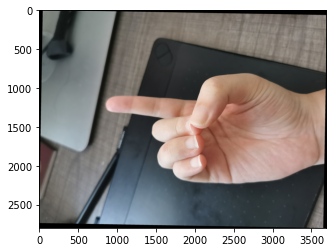

In [ ]:
#rotation
import math
from scipy import ndimage

slope_09 = (p9y - p0y) / (p9x - p0x)
angle = math.degrees(math.atan(slope_09))
print(angle)

#rotation angle in degree
a_image_rotated = ndimage.rotate(a_image, angle)
plt.imshow(cv.cvtColor(a_image_rotated,cv.COLOR_BGR2RGB))
